# <b>Amazon business analytics hackathon</b>

## 개요
  코로나 19 확산 이전부터 1인 가구 증가로 인한 배달 산업이 증가하고 있는 추세이다. 치킨집만 배달을 하던 시대에서 코로나 19 확산으로 인해 배달을 하지 않는 가게를 찾는 것이 더 어려운 시대로 변화하고 있다. Figure 01과 같이 외식업체들의 배달 플랫폼 이용률이 4년만에 5배가 올랐다.<br>
  
  ![배달앱 사용 비중](http://www.sisajournal-e.com/news/photo/202204/264716_108396_5435.jpg )<br>
 [Figure 01] 배달앱 사용 비중 변화<br>
 
  우리가 흔히 사용하고 있는 ‘배달의 민족’과 같은 배달 플랫폼에서 소비자에게 배달 예상 소요 시간을 제공하고 있다. 이 예상 시간은 음식 주문을 받은 점주의 '감'에 의존한 정보였다. 그날의 주문량이나 상황에 따른 점주의 주관적인 판단에 기반했기 때문에 정확도가 떨어졌다. 그래서 최근 배달 플랫폼에서는 배달 수행 빅데이터를 기반으로 주문자와의 거리까지 반영해 보다 정확한 배달 예상 소요 시간을 산출하고자 하고 있다. <br>

  하지만 더 좋은 정확도를 위해서는 주문자와의 거리뿐만 아니라 배달에 영향을 미치는 요인들을 합쳐 더 합리적인 방법으로 배달 소요 시간을 예측하여야 한다.<br>
  
  따라서 ‘아마존’ 배달 데이터를 활용하여 배달 소요 시간에 영향을 미치는 요인을 분석하고 배달 소요 시간을 예측하는 모델을 제작함으로써 점주에게는 더 효율적인 배달 환경을 구축하기 위한 피드백을, 소비자에게는 더 정확한 배달 예상 소요시간을 제공하고자 한다. 

## DATASET

<b>Delivery time Test.cvs</b>
- Source.name.1
- ID
- Delivery_person_ID
- Delivery_person_Age
- Delivery_person_Ratings
- Restaurant_latitude
- Restaurant_longtitude
- Delivery_location_latitude
- Delivery_location_longtitude
- Time_Orderd
- Time_Order_picked
- Weather conditions
- Road_traffic_density
- Vehicle_condition
- Type_of_Order
- Type_of_vehicle
- multiple_deliveries
- Festival
- City

<b>Delivery time.cvs</b>
- Source.name.1
- ID
- Delivery_person_ID
- Delivery_person_Age
- Delivery_person_Ratings
- Restaurant_latitude
- Restaurant_longtitude
- Delivery_location_latitude
- Delivery_location_longtitude
- Order_Date
- Time_Orderd
- Time_Order_picked
- Weather conditions
- Road_traffic_density
- Vehicle_condition
- Type_of_order
- Type_of_Vehicle
- Multiple_deliveries
- Feastival
- City
- Time_taken(min)



## DATA

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('delivery time Test.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Import data

In [9]:
delivery_data = pd.read_csv('delivery time.csv')
TakenTime = pd.read_csv('sample_submission.csv')

In [10]:
delivery_data

,Source.Name.1,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,39,0x3b07,SURRES06DEL03,28.0,4.7,21.185047,72.808590,21.245047,72.868590,11-03-2022,...,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24
1,77,0x8b41,PUNERES16DEL02,38.0,4.7,18.536718,73.830327,18.556718,73.850327,30-03-2022,...,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20
2,103,0xa200,SURRES07DEL01,30.0,4.7,21.170798,72.790489,21.280798,72.900489,29-03-2022,...,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24
3,203,0x62a1,PUNERES17DEL01,34.0,4.7,18.530963,73.828972,18.600963,73.898972,08-03-2022,...,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39
4,252,0x3c72,VADRES05DEL02,31.0,4.7,22.310526,73.170937,22.390526,73.250937,20-03-2022,...,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,39481,0x1107,VADRES07DEL01,21.0,4.8,0.000000,0.000000,0.040000,0.040000,01-03-2022,...,14:05,Cloudy,High,0,Buffet,motorcycle,1.0,No,Metropolitian,28
45589,40760,0xba4e,VADRES04DEL01,36.0,4.5,0.000000,0.000000,0.040000,0.040000,01-04-2022,...,14:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,29
45590,42237,0x6d85,RANCHIRES12DEL01,33.0,4.8,0.000000,0.000000,0.040000,0.040000,24-03-2022,...,14:25,Fog,High,0,Snack,motorcycle,1.0,No,Metropolitian,30
45591,43686,0x4a50,VADRES16DEL01,31.0,4.3,0.000000,0.000000,0.040000,0.040000,03-03-2022,...,14:05,Sandstorms,High,0,Meal,motorcycle,1.0,No,Metropolitian,48


In [13]:
new = delivery_data.drop(columns=['Source.Name.1','ID', 'Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings'])
new

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,21.185047,72.808590,21.245047,72.868590,11-03-2022,23:35,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24
1,18.536718,73.830327,18.556718,73.850327,30-03-2022,10:25,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20
2,21.170798,72.790489,21.280798,72.900489,29-03-2022,22:25,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24
3,18.530963,73.828972,18.600963,73.898972,08-03-2022,23:15,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39
4,22.310526,73.170937,22.390526,73.250937,20-03-2022,23:20,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0.000000,0.000000,0.040000,0.040000,01-03-2022,13:55,14:05,Cloudy,High,0,Buffet,motorcycle,1.0,No,Metropolitian,28
45589,0.000000,0.000000,0.040000,0.040000,01-04-2022,13:50,14:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,29
45590,0.000000,0.000000,0.040000,0.040000,24-03-2022,14:10,14:25,Fog,High,0,Snack,motorcycle,1.0,No,Metropolitian,30
45591,0.000000,0.000000,0.040000,0.040000,03-03-2022,14:00,14:05,Sandstorms,High,0,Meal,motorcycle,1.0,No,Metropolitian,48


<AxesSubplot: >

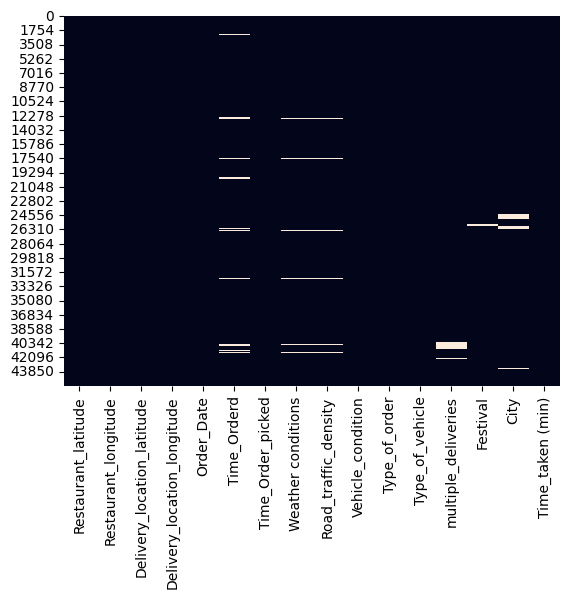

In [15]:
sns.heatmap(new.isnull(), cbar=False)

데이터에서 위도와 경도가 0인 row를 전부 삭제(위도나 경도 하나만 0인 경우는 없고 둘 다 0인 경우만 있어서 한번에 삭제가 가능)

In [6]:
zero = new[new['Restaurant_latitude'] <= 0.0].index
new.drop(zero, inplace=True)
new

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,21.185047,72.808590,21.245047,72.868590,11-03-2022,23:35,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24
1,18.536718,73.830327,18.556718,73.850327,30-03-2022,10:25,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20
2,21.170798,72.790489,21.280798,72.900489,29-03-2022,22:25,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24
3,18.530963,73.828972,18.600963,73.898972,08-03-2022,23:15,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39
4,22.310526,73.170937,22.390526,73.250937,20-03-2022,23:20,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41957,18.534080,73.898520,18.664080,74.028520,06-03-2022,18:00,18:15,Windy,Medium,2,Drinks,scooter,0.0,No,Metropolitian,30
41958,18.534080,73.898520,18.594080,73.958520,28-03-2022,20:35,20:40,Sunny,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,51
41959,18.534080,73.898520,18.594080,73.958520,21-03-2022,18:55,19:00,Windy,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,35
41960,18.534080,73.898520,18.644080,74.008520,18-03-2022,17:25,17:40,Sandstorms,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,29


In [7]:
new.isnull().sum()

Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1325
Time_Order_picked                 0
Weather conditions              420
Road_traffic_density            408
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             897
Festival                        215
City                           1097
Time_taken (min)                  0
dtype: int64

In [9]:
new.dropna(axis=0, how='any', inplace=True)
new.shape

(38138, 16)

In [10]:
new.isnull().sum()

Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [11]:
import datetime

df1= new['Time_Orderd']
df1=df1.values.tolist()
df2=[]
for i in df1:
  df2.append(datetime.datetime.strptime(i,"%H:%M"))
new['e_Time_Orderd']=df2

df1=new['Time_Order_picked']
df1=df1.values.tolist()
df2=[]
for i in df1:
  df2.append(datetime.datetime.strptime(i,"%H:%M"))
df2
new['e_Time_Order_picked']=df2

In [12]:
new

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),e_Time_Orderd,e_Time_Order_picked
0,21.185047,72.808590,21.245047,72.868590,11-03-2022,23:35,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24,1900-01-01 23:35:00,1900-01-01 23:45:00
1,18.536718,73.830327,18.556718,73.850327,30-03-2022,10:25,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,1900-01-01 10:25:00,1900-01-01 10:40:00
2,21.170798,72.790489,21.280798,72.900489,29-03-2022,22:25,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24,1900-01-01 22:25:00,1900-01-01 22:30:00
3,18.530963,73.828972,18.600963,73.898972,08-03-2022,23:15,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39,1900-01-01 23:15:00,1900-01-01 23:30:00
4,22.310526,73.170937,22.390526,73.250937,20-03-2022,23:20,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41,1900-01-01 23:20:00,1900-01-01 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41957,18.534080,73.898520,18.664080,74.028520,06-03-2022,18:00,18:15,Windy,Medium,2,Drinks,scooter,0.0,No,Metropolitian,30,1900-01-01 18:00:00,1900-01-01 18:15:00
41958,18.534080,73.898520,18.594080,73.958520,28-03-2022,20:35,20:40,Sunny,Jam,0,Buffet,motorcycle,3.0,No,Metropolitian,51,1900-01-01 20:35:00,1900-01-01 20:40:00
41959,18.534080,73.898520,18.594080,73.958520,21-03-2022,18:55,19:00,Windy,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,35,1900-01-01 18:55:00,1900-01-01 19:00:00
41960,18.534080,73.898520,18.644080,74.008520,18-03-2022,17:25,17:40,Sandstorms,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,29,1900-01-01 17:25:00,1900-01-01 17:40:00


In [13]:
import datetime as dt
import holidays
# <요일, 주말>
new['Order_Date']=pd.to_datetime(new['Order_Date'])
new['weekday']=new['Order_Date'].dt.weekday
def weekend(row):
  if row == 5 or row == 6:
    return 1
  else:
    return 0
new['weekend']=new['weekday'].apply(weekend)

# <공휴일>
india_holidays = holidays.India()
def holiday(row):
  if india_holidays.get(row) != None:
    return 1
  else:
    return 0
new['holiday']=new['Order_Date'].apply(holiday)

/var/folders/rp/pmxnnzn55wx5xyvnnpmx4d3m0000gn/T/ipykernel_92585/1332018980.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['Order_Date']=pd.to_datetime(new['Order_Date'])


trian data와 test data 나누기

In [14]:
X_delivery_data = new.drop("Time_taken (min)", axis=1)
y_delivery_data = new['Time_taken (min)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_delivery_data,
                                                     y_delivery_data,
                                                     test_size=0.2,
                                                     shuffle = True,
                                                     random_state = 1002)

In [16]:
new_train = pd.concat([X_train, y_train], axis=1)
new_test = pd.concat([X_test, y_test], axis=1)

In [17]:
new_test.shape, new_train.shape

((7628, 21), (30510, 21))

합치기 전에 train과 test를 구별할 수 있는 컬럼을 추가

In [18]:
new = pd.concat([new_train, new_test])
new.shape

(38138, 21)

In [19]:
new_train.shape, new_test.shape

((30510, 21), (7628, 21))

In [20]:
new_train

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,...,Type_of_vehicle,multiple_deliveries,Festival,City,e_Time_Orderd,e_Time_Order_picked,weekday,weekend,holiday,Time_taken (min)
17686,30.372202,78.077151,30.452202,78.157151,2022-12-02,17:40,17:45,Windy,Medium,2,...,electric_scooter,1.0,No,Metropolitian,1900-01-01 17:40:00,1900-01-01 17:45:00,4,0,0,22
21888,13.029780,80.208812,13.139780,80.318812,2022-03-16,17:15,17:30,Windy,Medium,2,...,scooter,1.0,No,Urban,1900-01-01 17:15:00,1900-01-01 17:30:00,2,0,0,28
18673,15.303897,73.914336,15.353897,73.964336,2022-11-02,20:10,20:25,Sunny,Jam,2,...,electric_scooter,1.0,No,Metropolitian,1900-01-01 20:10:00,1900-01-01 20:25:00,2,0,0,19
14698,11.022169,76.999594,11.112169,77.089594,2022-03-18,19:25,19:35,Fog,Jam,2,...,scooter,1.0,No,Metropolitian,1900-01-01 19:25:00,1900-01-01 19:35:00,4,0,1,31
15852,12.316967,76.603067,12.356967,76.643067,2022-09-03,12:10,12:20,Sunny,High,2,...,scooter,1.0,No,Metropolitian,1900-01-01 12:10:00,1900-01-01 12:20:00,5,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,26.910262,75.783013,26.950262,75.823013,2022-03-19,15:25,15:35,Sandstorms,Medium,0,...,motorcycle,1.0,No,Metropolitian,1900-01-01 15:25:00,1900-01-01 15:35:00,5,1,0,28
36120,23.357804,85.325146,23.377804,85.345146,2022-03-17,9:25,9:40,Fog,Low,2,...,scooter,0.0,No,Metropolitian,1900-01-01 09:25:00,1900-01-01 09:40:00,3,0,0,14
22790,22.725835,75.887648,22.815835,75.977648,2022-03-23,20:50,21:00,Windy,Jam,2,...,scooter,1.0,No,Urban,1900-01-01 20:50:00,1900-01-01 21:00:00,2,0,0,16
15452,12.975377,77.696664,13.055377,77.776664,2022-08-03,20:15,20:25,Sandstorms,Jam,1,...,scooter,1.0,No,Metropolitian,1900-01-01 20:15:00,1900-01-01 20:25:00,2,0,0,16


In [21]:
new_test

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,...,Type_of_vehicle,multiple_deliveries,Festival,City,e_Time_Orderd,e_Time_Order_picked,weekday,weekend,holiday,Time_taken (min)
3818,21.170096,72.789122,21.260096,72.879122,2022-02-03,21:20,21:30,Sandstorms,Jam,0,...,motorcycle,1.0,No,Metropolitian,1900-01-01 21:20:00,1900-01-01 21:30:00,3,0,0,31
31559,26.891191,75.802083,26.901191,75.812083,2022-03-28,11:55,12:10,Sandstorms,High,2,...,motorcycle,0.0,No,Metropolitian,1900-01-01 11:55:00,1900-01-01 12:10:00,0,0,0,26
36502,11.021278,76.995017,11.131278,77.105017,2022-03-18,23:35,23:50,Cloudy,Low,1,...,scooter,0.0,No,Metropolitian,1900-01-01 23:35:00,1900-01-01 23:50:00,4,0,1,26
6336,12.299524,76.642620,12.339524,76.682620,2022-03-17,14:45,14:50,Cloudy,High,0,...,motorcycle,1.0,No,Metropolitian,1900-01-01 14:45:00,1900-01-01 14:50:00,3,0,0,31
19749,19.207222,72.972281,19.257222,73.022281,2022-01-03,22:55,23:10,Sandstorms,Low,0,...,motorcycle,1.0,No,Urban,1900-01-01 22:55:00,1900-01-01 23:10:00,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33306,18.562450,73.916619,18.612450,73.966619,2022-03-28,21:50,22:05,Windy,Jam,2,...,motorcycle,0.0,No,Metropolitian,1900-01-01 21:50:00,1900-01-01 22:05:00,0,0,0,20
27301,26.892312,75.806896,26.942312,75.856896,2022-03-17,17:10,17:25,Cloudy,Medium,1,...,motorcycle,0.0,No,Urban,1900-01-01 17:10:00,1900-01-01 17:25:00,3,0,0,15
27483,12.972532,77.608179,13.012532,77.648179,2022-09-03,13:30,13:35,Stormy,High,1,...,motorcycle,0.0,No,Urban,1900-01-01 13:30:00,1900-01-01 13:35:00,5,1,0,24
29217,13.029198,77.570997,13.049198,77.590997,2022-07-03,8:10,8:15,Stormy,Low,0,...,motorcycle,0.0,No,Urban,1900-01-01 08:10:00,1900-01-01 08:15:00,6,1,0,16


In [22]:
new_train.to_csv('new_train.csv')
new_test.to_csv('new_test.csv')

In [23]:
import numpy as np 
import pandas as pd 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
TRAIN_PATH = "new_train.csv"
#TEST_PATH = "new_test.csv"

In [25]:
df = pd.read_csv(TRAIN_PATH)
df.shape

(30510, 22)

In [26]:
df['distance']=0
df

,Unnamed: 0,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,...,multiple_deliveries,Festival,City,e_Time_Orderd,e_Time_Order_picked,weekday,weekend,holiday,Time_taken (min),distance
0,17686,30.372202,78.077151,30.452202,78.157151,2022-12-02,17:40,17:45,Windy,Medium,...,1.0,No,Metropolitian,1900-01-01 17:40:00,1900-01-01 17:45:00,4,0,0,22,0
1,21888,13.029780,80.208812,13.139780,80.318812,2022-03-16,17:15,17:30,Windy,Medium,...,1.0,No,Urban,1900-01-01 17:15:00,1900-01-01 17:30:00,2,0,0,28,0
2,18673,15.303897,73.914336,15.353897,73.964336,2022-11-02,20:10,20:25,Sunny,Jam,...,1.0,No,Metropolitian,1900-01-01 20:10:00,1900-01-01 20:25:00,2,0,0,19,0
3,14698,11.022169,76.999594,11.112169,77.089594,2022-03-18,19:25,19:35,Fog,Jam,...,1.0,No,Metropolitian,1900-01-01 19:25:00,1900-01-01 19:35:00,4,0,1,31,0
4,15852,12.316967,76.603067,12.356967,76.643067,2022-09-03,12:10,12:20,Sunny,High,...,1.0,No,Metropolitian,1900-01-01 12:10:00,1900-01-01 12:20:00,5,1,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,4335,26.910262,75.783013,26.950262,75.823013,2022-03-19,15:25,15:35,Sandstorms,Medium,...,1.0,No,Metropolitian,1900-01-01 15:25:00,1900-01-01 15:35:00,5,1,0,28,0
30506,36120,23.357804,85.325146,23.377804,85.345146,2022-03-17,9:25,9:40,Fog,Low,...,0.0,No,Metropolitian,1900-01-01 09:25:00,1900-01-01 09:40:00,3,0,0,14,0
30507,22790,22.725835,75.887648,22.815835,75.977648,2022-03-23,20:50,21:00,Windy,Jam,...,1.0,No,Urban,1900-01-01 20:50:00,1900-01-01 21:00:00,2,0,0,16,0
30508,15452,12.975377,77.696664,13.055377,77.776664,2022-08-03,20:15,20:25,Sandstorms,Jam,...,1.0,No,Metropolitian,1900-01-01 20:15:00,1900-01-01 20:25:00,2,0,0,16,0


In [27]:
len(df)

30510

In [28]:
START = 15000
END = len(df)
END - START

15510

In [29]:
#구글 distance API 호출 파트


import requests
count = 0

for i in range(START,len(df)): #0번부터 14999번 행 까지의 데이터 순회
    row = df.iloc[i]
    url = "https://maps.googleapis.com/maps/api/distancematrix/" + \
    "json?units=metric&mode=transit&origins="+str(row['Restaurant_latitude'])+   "" + \
    ","+str(row['Restaurant_longitude'])+"&destinations="+str(row['Delivery_location_latitude'])+","+str(row['Delivery_location_longitude'])+"&"+ \
    "&key="
    requestData = requests.get(url)

    jsonData = None
    if requestData.status_code == 200:
        jsonData = requestData.json()
        # print(jsonData)
        if jsonData.get("rows")[0].get("elements")[0].get("status") == 'ZERO_RESULTS':
            distance = 0
            count+=1
        else : 
            distance = jsonData.get("rows")[0].get("elements")[0].get("distance").get("text").replace(' km','')
        
        df.loc[i,'distance'] = distance
    
    if i % 100 == 0:
        print('[i = %d] count = %d, error rate = %f'%( i, count, (count/(i-START+1))))
    if i == len(df)-1:
        print('end of for loop')


IndexError: list index out of range

In [ ]:
df.to_csv('train+distance.csv') 

In [ ]:
test = df[15000:]
total = END-START
error = test[test['distance']==0]['distance'].count()
print('error rate = %0.2f'%(error/total*100))

error rate = 27.79


## Data Cleaning

In [30]:
import scipy.stats as stats

sns.distplot(df['Delivery_person_Age'], kde=False)

KeyError: 'Delivery_person_Age'

/var/folders/rp/pmxnnzn55wx5xyvnnpmx4d3m0000gn/T/ipykernel_87853/2535800160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery_person_Ratings'], kde=False, fit=stats.johnsonsu)


<AxesSubplot: xlabel='Delivery_person_Ratings'>

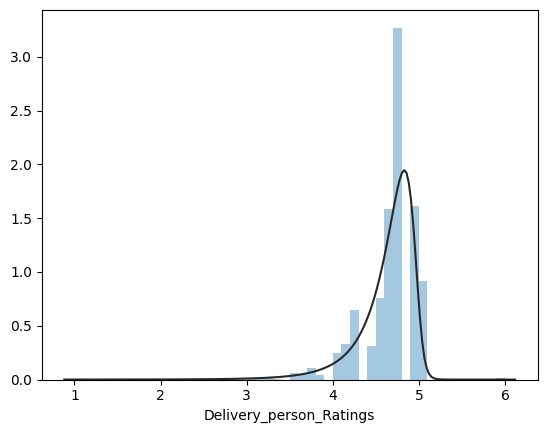

In [ ]:

sns.distplot(df['Delivery_person_Ratings'], kde=False, fit=stats.johnsonsu)

/var/folders/rp/pmxnnzn55wx5xyvnnpmx4d3m0000gn/T/ipykernel_87853/1302775173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time_taken (min)'], kde=False, fit=stats.johnsonsu)


<AxesSubplot: xlabel='Time_taken (min)'>

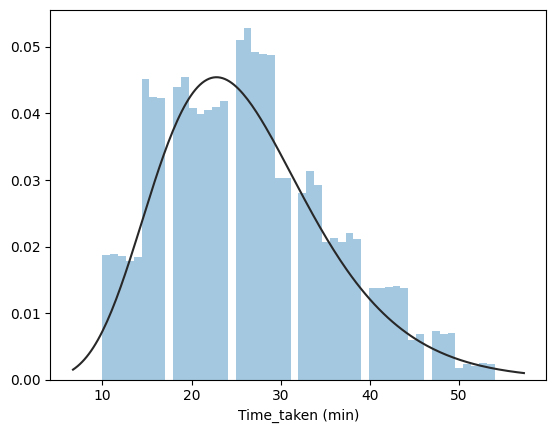

In [ ]:
sns.distplot(df['Time_taken (min)'], kde=False, fit=stats.johnsonsu)

In [ ]:
df.drop(columns=['Source.Name.1', 'ID', 'Delivery_person_ID'])

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,28.0,4.7,21.185047,72.808590,21.245047,72.868590,11-03-2022,23:35,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24
1,38.0,4.7,18.536718,73.830327,18.556718,73.850327,30-03-2022,10:25,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20
2,30.0,4.7,21.170798,72.790489,21.280798,72.900489,29-03-2022,22:25,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24
3,34.0,4.7,18.530963,73.828972,18.600963,73.898972,08-03-2022,23:15,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39
4,31.0,4.7,22.310526,73.170937,22.390526,73.250937,20-03-2022,23:20,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,21.0,4.8,0.000000,0.000000,0.040000,0.040000,01-03-2022,13:55,14:05,Cloudy,High,0,Buffet,motorcycle,1.0,No,Metropolitian,28
45589,36.0,4.5,0.000000,0.000000,0.040000,0.040000,01-04-2022,13:50,14:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,29
45590,33.0,4.8,0.000000,0.000000,0.040000,0.040000,24-03-2022,14:10,14:25,Fog,High,0,Snack,motorcycle,1.0,No,Metropolitian,30
45591,31.0,4.3,0.000000,0.000000,0.040000,0.040000,03-03-2022,14:00,14:05,Sandstorms,High,0,Meal,motorcycle,1.0,No,Metropolitian,48


In [ ]:
df.isnull().sum()

Source.Name.1                     0
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [ ]:
longi = train[train['Restaurant_longitude'] <= 0.0] 

In [31]:
lati = train[train['Restaurant_latitude'] <= 0.0 ]

NameError: name 'train' is not defined

In [32]:
test.head(10)

NameError: name 'test' is not defined

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'xgboost'